C:\Users\10480\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\10480\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
d:\CS443\cartpole\dqn.py:47: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool8)
C:\Users\104

Episode 0: Done; Average score 14.0
Episode 100: Done; Average score 23.83
Episode 200: Done; Average score 21.18
Episode 300: Done; Average score 23.85
Episode 400: Done; Average score 23.96
Episode 500: Done; Average score 29.11
Episode 600: Done; Average score 31.75
Episode 700: Done; Average score 34.6
Episode 800: Done; Average score 30.75
Episode 900: Done; Average score 32.31


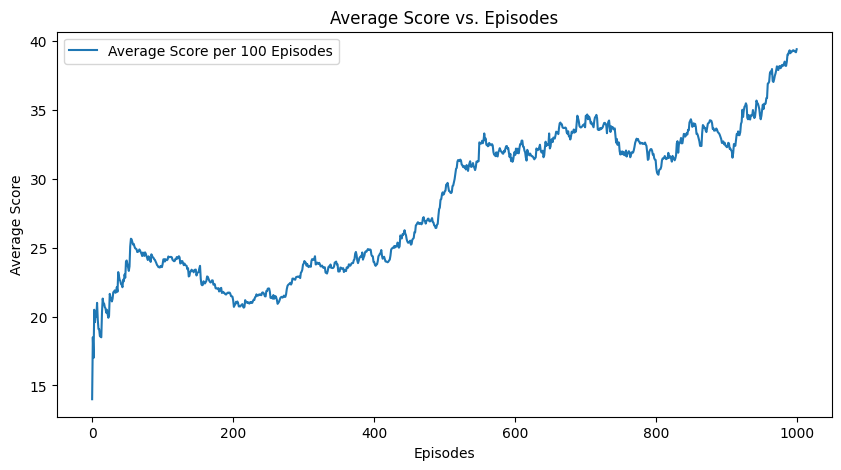

In [1]:
import gym 
from dqn import *
import matplotlib.pyplot as plt
env = gym.make('CartPole-v1')
state = env.reset()
agent = Agent(gamma=0.99, epsilon=1, lr=0.003, max_mem_size=int(1e5), input_dims=int(env.observation_space.shape[0]), batch_size=64, n_actions=env.action_space.n, eps_end=1e-2, eps_dec=1e-5)
#agent.reload_checkpoint('checkpoints/dqn_checkpoint_900.pth')
num_episodes = int(1e3)
scores = []
average_scores = []
for i in range(num_episodes):
    done = False
    state = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(state)
        new_state, reward, done, info = env.step(action)
        agent.store_transition(state, action, reward, new_state, done)
        agent.learn()
        state = new_state
        score += reward
    scores.append(score)
    avg_score = np.mean(scores[-100:])
    average_scores.append(avg_score)
    if i % 100 == 0:
        print(f'Episode {i}: Done; Average score {avg_score}')
        agent.save_checkpoint(iteration=i)
plt.figure(figsize=(10, 5))
plt.plot(average_scores, label='Average Score per 100 Episodes')
plt.title('Average Score vs. Episodes')
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.legend()
plt.show()

Episode 0: Done; Average score 39.39
Episode 100: Done; Average score 42.64
Episode 200: Done; Average score 39.05
Episode 300: Done; Average score 52.73
Episode 400: Done; Average score 57.31
Episode 500: Done; Average score 68.58
Episode 600: Done; Average score 98.46
Episode 700: Done; Average score 173.02
Episode 800: Done; Average score 323.65
Episode 900: Done; Average score 332.62


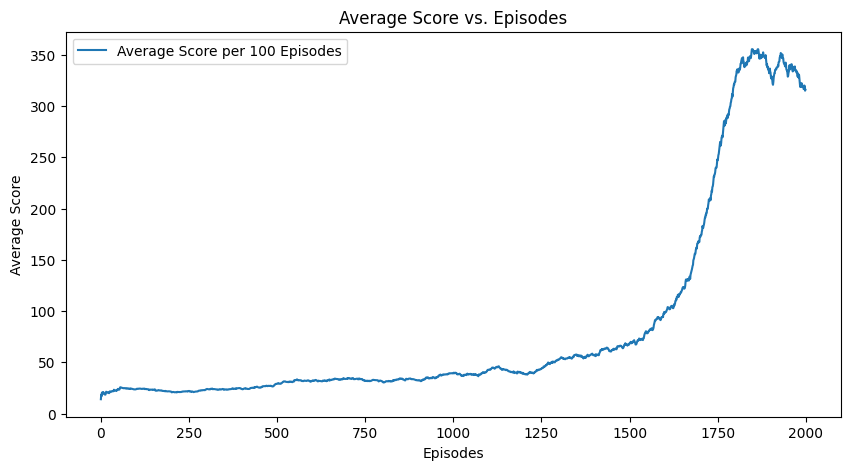

In [2]:
agent.reload_checkpoint('checkpoints/dqn_checkpoint_900.pth')
for i in range(num_episodes):
    done = False
    state = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(state)
        new_state, reward, done, info = env.step(action)
        agent.store_transition(state, action, reward, new_state, done)
        agent.learn()
        state = new_state
        score += reward
    scores.append(score)
    avg_score = np.mean(scores[-100:])
    average_scores.append(avg_score)
    if i % 100 == 0:
        print(f'Episode {i}: Done; Average score {avg_score}')
        agent.save_checkpoint(iteration=i)
plt.figure(figsize=(10, 5))
plt.plot(average_scores, label='Average Score per 100 Episodes')
plt.title('Average Score vs. Episodes')
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.legend()
plt.show()

Episode 0: Done; Average score 319.06
Episode 100: Done; Average score 327.84


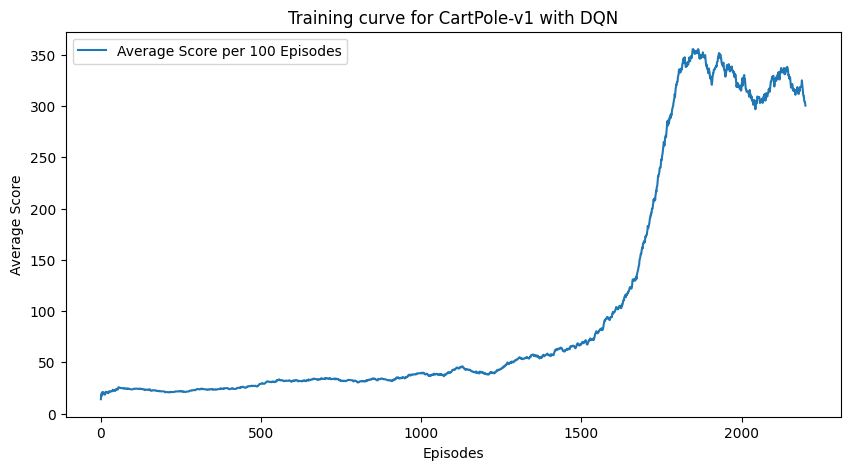

In [3]:
num_episodes = int(200)
agent.reload_checkpoint('checkpoints/dqn_checkpoint_900.pth')
for i in range(num_episodes):
    done = False
    state = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(state)
        new_state, reward, done, info = env.step(action)
        agent.store_transition(state, action, reward, new_state, done)
        agent.learn()
        state = new_state
        score += reward
    scores.append(score)
    avg_score = np.mean(scores[-100:])
    average_scores.append(avg_score)
    if i % 100 == 0:
        print(f'Episode {i}: Done; Average score {avg_score}')
        agent.save_checkpoint(iteration=i)
plt.figure(figsize=(10, 5))
plt.plot(average_scores, label='Average Score per 100 Episodes')
plt.title('Training curve for CartPole-v1 with DQN')
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.legend()
plt.show()